# Building Figures in Plotly using Dictionaries

https://plotly.com/python/creating-and-updating-figures/

In [67]:
from datetime import datetime, timedelta
from typing import Any

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from numpy.typing import NDArray

## Helpful Functions

In [68]:
def datetime_range(start: datetime, end: datetime, step: timedelta) -> list[datetime]:
    """Generate a list of datetime objects from start to end with a specified step.

    :param start: Start datetime
    :type start: datetime
    :param end: End datetime
    :type end: datetime
    :param step: Time delta for each step
    :type step: timedelta
    :return: List of datetime objects
    :rtype: list[datetime]

    """
    return [start + i * step for i in range((end - start) // step)]


def generate_plot_data(
    x: list[datetime] | NDArray[datetime],
    y: list[float] | list[int] | NDArray[float] | NDArray[int],
) -> list[dict[str, Any]]:
    """Generate a simple plot data structure for a scatter plot.

    :param x: X-axis data (can be datetime, int, or float)
    :type x: datetime | int | float
    :param y: Y-axis data (int or float)
    :type y: int | float
    :return: List containing a dictionary with plot data
    :rtype: list

    """
    return [
        {
            "type": "scattergl",
            "x": x,
            "y": y,
            "name": "made up data",
            "line": {"color": "#444444", "width": 1, "shape": "hv"},
            "marker": {"color": "#444444", "size": 2},
            "mode": "lines+markers",
        },
    ]

## Build Plot

### Plot Formatting

In [69]:
width = 1200

height = 600

font = "Arial"

title_format = {
    "family": font,
    "size": 36,
    "color": "#444444",
}

axis_format = {"family": font, "size": 24, "color": "#444444"}

label_format = {"family": font, "size": 28, "color": "#444444"}

time_axis_format = [
    dict(dtickrange=[None, 1000], value="%H:%M:%S.%L\n%Y:%j"),
    dict(dtickrange=[1000, 60000], value="%H:%M:%S\n%Y:%j"),
    dict(dtickrange=[60000, 315360000], value="%Y:%j"),
    dict(dtickrange=[315360000, "M1"], value="%e %b\n%Y:%j"),
    dict(dtickrange=["M1", "M6"], value="%Y:%j"),
    dict(dtickrange=["M6", None], value="%Y"),
]

### X Time Array

In [70]:
now = datetime.now()
end = datetime(2025, 10, 24)

times = datetime_range(now, end, timedelta(days=1))

### Y Values Array

In [71]:
n = len(times)
values = (
    np.exp(np.linspace(0, 5, n))
    + 10 * np.sin(2 * np.pi * np.linspace(0, 5, n))
    + 10 * np.random.normal(scale=0.5, size=n)
)

### Assemble Plot Data

In [72]:
plot_data = generate_plot_data(times, values)

### Other Plot Inputs

In [73]:
title = "Example Plot"
y_label = "Made up data"

### Plot Definition Dictionary

In [76]:
plot_object = {
    "data": plot_data,
    "layout": {
        "hovermode": "closest",
        "autosize": False,
        "width": width,
        "height": height,
        "title": {
            "text": title,
            "font": title_format,
            "y": 0.92,
            "x": 0.5,
            "xanchor": "center",
            "yanchor": "top",
        },
        "yaxis": {
            "title": {"text": y_label, "font": label_format},
            "tickfont": axis_format,
            #                 'range': [-18, -6],
            "domain": [0, 1],
            "zeroline": False,
            "linecolor": "#333333",
            "linewidth": 1,
            "mirror": True,
        },
        "xaxis": {
            "domain": [0, 1],
            "tickfont": axis_format,
            "tickformatstops": time_axis_format,
            "zeroline": False,
            "linecolor": "#333333",
            "linewidth": 1,
            "mirror": True,
        },
        "shapes": None,
        "annotations": None,
        "showlegend": False,
        "template": "plotly_white",
    },
}

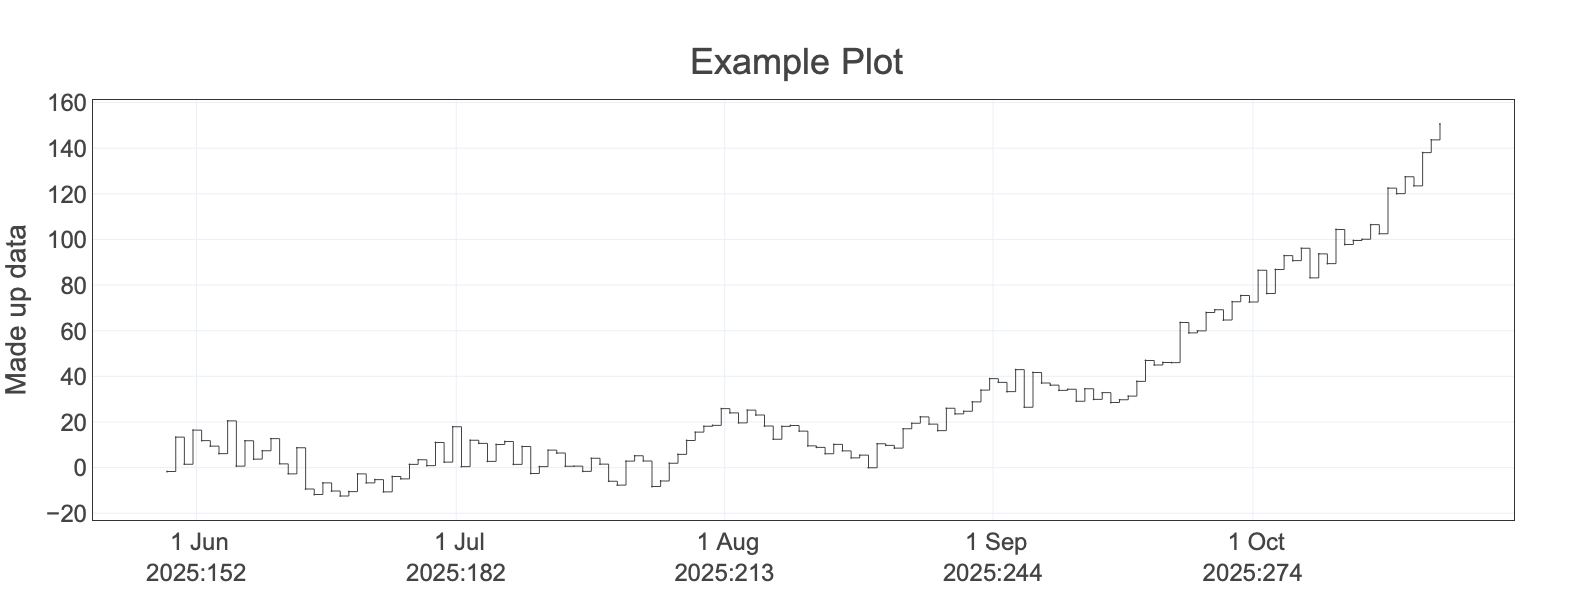

In [77]:
pio.show(plot_object)